In [1]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
def augment_x_y(bgr_image, points_narray, angle_N = 25, flip_image=True):
    '''
    Inputs:
     - bgr_image: bgr image that we want to tansform
     - points_narray: numpy array of points (N,2) that we want to tansform ([[x0,y0], [x1,y1], ...])
     - angle_N: random range of angle between [-angle_N, angle_N]
     - flip_image: if True, flip the image horizontally or vertically
    Returns:
     - transformed_image
     - transformed_points
    '''
    
    angle = random.randint(-angle_N, angle_N)
    
    bgr_image = bgr_image.copy()
    points_narray = points_narray.copy()
    rows, cols, _ = bgr_image.shape
    (cX, cY) = (cols // 2, rows // 2)
    
    if flip_image:
        if np.random.rand() > 0.5:
            bgr_image = cv2.flip(bgr_image, 1)
            for pts in points_narray:
                pts[0] = cols-pts[0]
        else:
            bgr_image = cv2.flip(bgr_image, 0)
            for pts in points_narray:
                pts[1] = rows-pts[1]
    
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1)
    M = np.vstack((M, [0, 0, 1]))
    
    # x_shift_N = 0, y_shift_N = 0
    # x_shift = random.randint(-x_shift_N, x_shift_N)
    # y_shift = random.randint(-y_shift_N, y_shift_N)
    # M[0,2] = x_shift
    # M[1,2] = y_shift
    
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    new_W = int((rows * sin) + (cols * cos))
    new_H = int((rows * cos) + (cols * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (new_W / 2) - cX
    M[1, 2] += (new_H / 2) - cY
    
    transformed_points = cv2.perspectiveTransform(points_narray[np.newaxis,:,:], M)
    transformed_points = transformed_points[0]

    bgr_image = cv2.warpPerspective(bgr_image, M, (new_W, new_H))
    
    return bgr_image, transformed_points

# Example

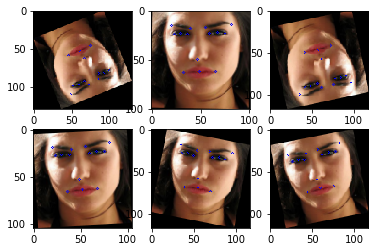

In [4]:
bgr_img = cv2.imread("1.jpg")
points_narray = np.loadtxt('1.pts', delimiter=',') # x0,y0,x1,y1,x2,y2... of shape (2N,)
points_narray = np.reshape(points_narray, (-1, 2)) # reshape to (N,2)

for i in range(1, 7):
    plt.subplot(2, 3, i)
    transformed_image, transformed_points = augment_x_y(bgr_img, points_narray)

    draw_img = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)
    for pt in transformed_points:
        cv2.circle(draw_img, (int(pt[0]), int(pt[1])), 1, color=(0,0,255))

    plt.imshow(draw_img)